## sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

## sklearn.model_selection.cross_val_score
* sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

In [3]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score

In [4]:
boston_df = pd.read_csv('./datasets/Boston.csv', index_col=0)
boston_df

y_target = boston_df['medv']
x_data = boston_df.drop('medv', axis=1)

In [5]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(np.round(neg_mse_scores,3))
print(np.round(rmse_scores,3))
print(np.round(avg_rmse,3))

[-11.422 -24.294 -28.144 -74.599 -28.517]
[3.38  4.929 5.305 8.637 5.34 ]
5.518


In [6]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(alpha, avg_rmse)


0 5.828658946215808
0.1 5.788486627032413
1 5.652570965613546
10 5.518166280868974
100 5.3295896284721485


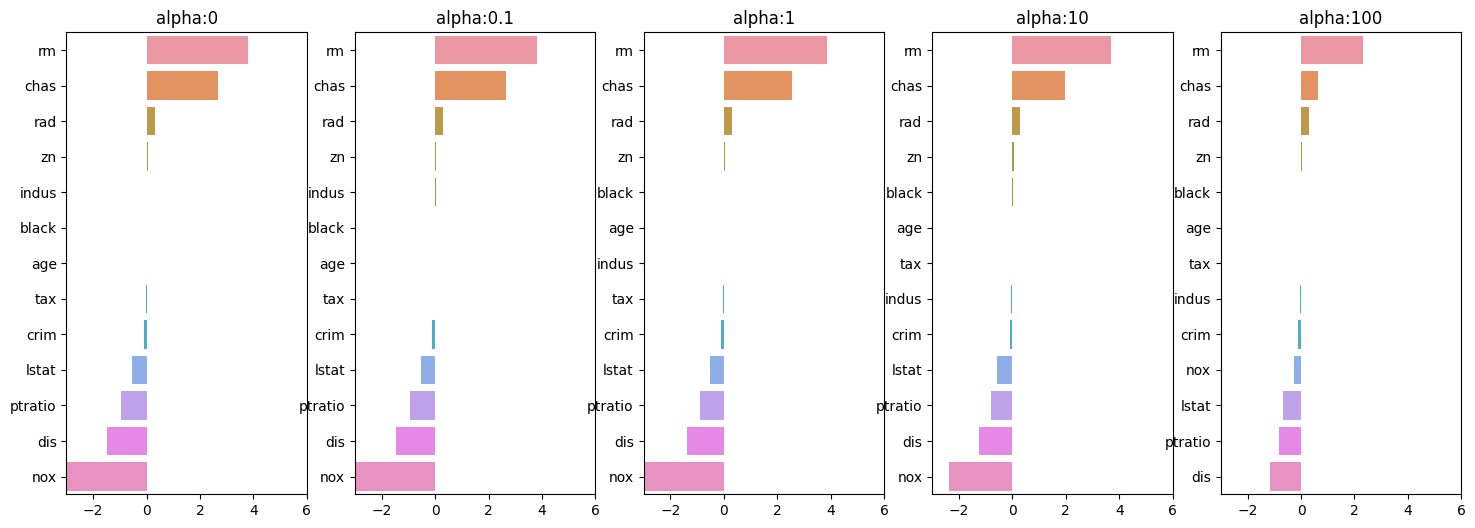

In [7]:
fig, axs= plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index, ax=axs[pos])

plt.show()

In [8]:
alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(alphas[0])
print(sort_column)
coeff_df.sort_values(by=sort_column, ascending=False)

alpha:0


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.809865,3.818233,3.854000,3.702272,2.334536
chas,2.686734,2.670019,2.552393,1.952021,0.638335
rad,0.306049,0.303515,0.290142,0.279596,0.315358
zn,0.046420,0.046572,0.047443,0.049579,0.054496
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
black,0.009312,0.009368,0.009673,0.010037,0.009393
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## sklearn.linear_model.Lasso
* class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

## sklearn.linear_model.ElasticNet
* class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [9]:
from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params=None, x_data_n=None,\
    y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('######' , model_name, '######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, \
            scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print(param, avg_rmse)
        model.fit(x_data, y_target)
        coeff = pd.Series(data=model.coef_, index=x_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [10]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x_data,\
    y_target_n=y_target)

###### Lasso ######
0.07 5.612284267526676
0.1 5.615116035266935
0.5 5.6691234095948975
1 5.776020813823375
3 6.188763210800905


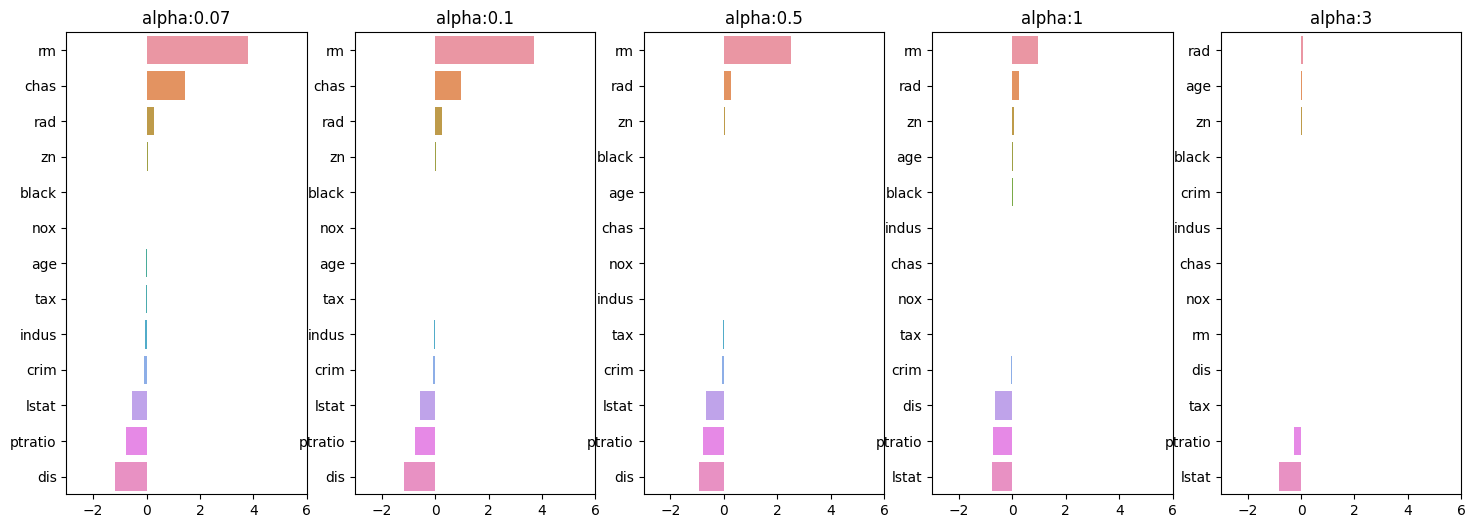

In [11]:
fig, axs= plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(lasso_alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_data, y_target)
    coeff = pd.Series(data=lasso.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index, ax=axs[pos])

plt.show()

In [12]:
sort_column = 'alpha:' + str(lasso_alphas[0])
print(sort_column)
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.789725,3.703202,2.498212,0.949811,0.000000
chas,1.434343,0.955190,0.000000,0.000000,0.000000
rad,0.270936,0.274707,0.277451,0.264206,0.061864
zn,0.049059,0.049211,0.049544,0.049165,0.037231
black,0.010248,0.010249,0.009469,0.008247,0.006510
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
age,-0.011706,-0.010037,0.003604,0.020910,0.042495
tax,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
indus,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
crim,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [13]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n=x_data,\
    y_target_n=y_target)

###### ElasticNet ######
0.07 5.541654347348139
0.1 5.52592849629491
0.5 5.466748649445586
1 5.596874445109748
3 6.068121638621163


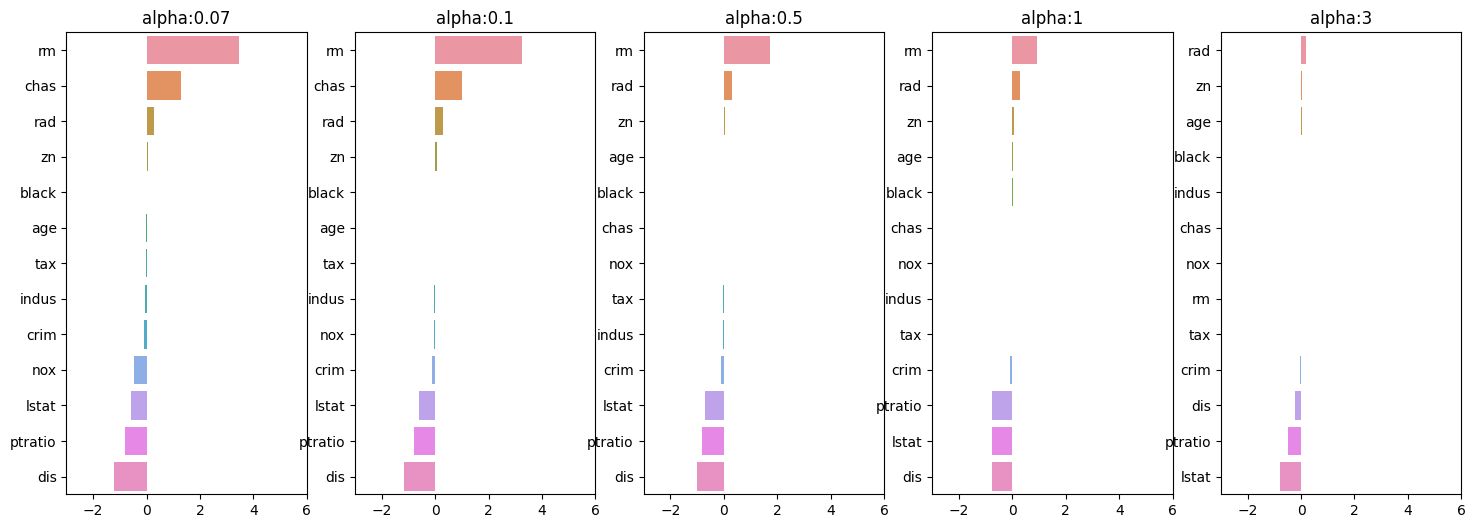

In [14]:
fig, axs= plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(elastic_alphas):
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(x_data, y_target)
    coeff = pd.Series(data=elastic.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index, ax=axs[pos])

plt.show()

In [15]:
sort_column = 'alpha:' + str(elastic_alphas[0])
print(sort_column)
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.574162,3.414154,1.918419,0.938789,0.000000
chas,1.330724,0.979706,0.000000,0.000000,0.000000
rad,0.278880,0.283443,0.300761,0.289299,0.146846
zn,0.050107,0.050617,0.052878,0.052136,0.038268
black,0.010122,0.010067,0.009114,0.008320,0.007020
age,-0.010116,-0.008276,0.007760,0.020348,0.043446
tax,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
indus,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
crim,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
nox,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

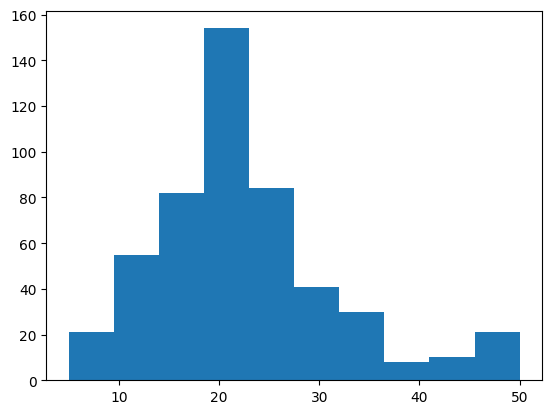

In [16]:
import matplotlib.pyplot as plt
plt.hist(y_target,bins=10)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# method는 표준 정규 분포 변환(standard), 최댓값/최솟값 정규화(Min,Max), 로그변환(log) 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None',p_degree=None,input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data) # 로그변환 시 log+1(숫자)+p
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [20]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출
alphas = [0.1,1,10,100]
# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환
scale_methods = [(None,None), ('Standard',None), ('Standard',2), ('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    x_data_scaled = get_scaled_data(method=scale_method[0],p_degree=scale_method[1],input_data=x_data)
    print('\n## 변환 유형:{0},Polynomial Degree{1}'.format(scale_method[0],scale_method[1]))
    # alpha 값에 따른 회귀 모델의 fold 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수
    get_linear_reg_eval('Ridge',params=alphas,x_data_n=x_data_scaled,y_target_n=y_target,verbose=False)


## 변환 유형:None,Polynomial DegreeNone
0.1 5.788486627032413
1 5.652570965613546
10 5.518166280868974
100 5.3295896284721485

## 변환 유형:Standard,Polynomial DegreeNone
0.1 5.825992799389443
1 5.802889517257739
10 5.636831222559071
100 5.421374711794965

## 변환 유형:Standard,Polynomial Degree2
0.1 8.827235873005124
1 6.871287525963181
10 5.484870425533401
100 4.634437778261924

## 변환 유형:MinMax,Polynomial DegreeNone
0.1 5.76357022528831
1 5.4650450815649405
10 5.754163637679423
100 7.634919863623539

## 변환 유형:MinMax,Polynomial Degree2
0.1 5.297560003126961
1 4.322660371524893
10 5.185204257580534
100 6.5378668897043655

## 변환 유형:Log,Polynomial DegreeNone
0.1 4.770429614681662
1 4.676227018966874
10 4.836439992635269
100 6.240916232719036
